# 3. Variables Aleatorias y sus Distribuciones

Las variables aleatorias son un concepto increíblemente útil que simplifica la notación y amplía nuestra capacidad para cuantificar la incertidumbre y resumir los resultados de experimentos. Las variables aleatorias son esenciales en toda la estadística, por lo que es crucial entender qué significan, tanto intuitiva como matemáticamente.

## 3.1. Variables Aleatorias

Para ver por qué nuestra notación actual puede volverse rápidamente difícil de manejar, consideremos el problema de la ruina del jugador

Ejemplo 3.1.1 (Ruina del jugador). Dos jugadores, A y B, hacen una secuencia de apuestas de $1 dólar. En cada apuesta, el jugador A tiene probabilidad $p$ de ganar, y el jugador B tiene probabilidad $q = 1 - p$ de ganar. El jugador A comienza con $i$ dólares y el jugador B comienza con $N - i$ dólares; la riqueza total entre los dos permanece constante ya que cada vez que A pierde un dólar, el dólar va a B, y viceversa.

Podemos visualizar este juego como una caminata aleatoria sobre los enteros entre 0 y $N$, donde $p$ es la probabilidad de ir a la derecha en un paso dado: imaginemos a una persona que comienza en la posición $i$ y, en cada paso de tiempo, se mueve un paso a la derecha con probabilidad $p$ y un paso a la izquierda con probabilidad $q = 1 - p$. El juego termina cuando A o B se arruina, es decir, cuando la caminata aleatoria alcanza 0 o $N$. ¿Cuál es la probabilidad de que A gane el juego (llevándose todo el dinero)?

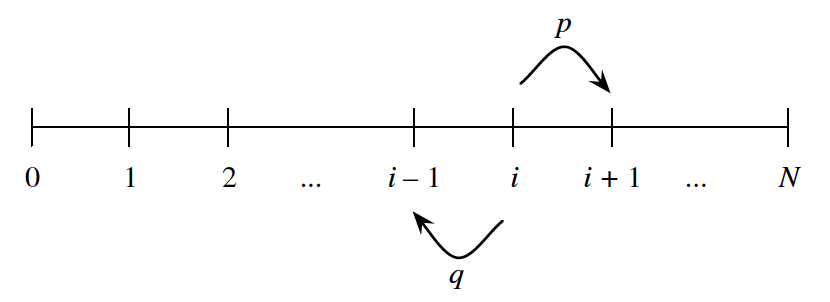

Solución:

Reconocemos que este juego tiene una estructura recursiva: después del primer paso, la riqueza de A es ahora $i + 1$ o $i - 1$. Sea $p_i$ la probabilidad de que A gane el juego, dado que A comienza con $i$ dólares. Usaremos el análisis del primer paso para resolver para las $p_i$. Sea $W$ el evento de que A gane el juego. Por LOTP, condicionando sobre el resultado de la primera ronda, tenemos:

$$p_i = P(W|A \text{ comienza en } i, \text{ gana ronda 1}) \cdot p + P(W|A \text{ comienza en } i, \text{ pierde ronda 1}) \cdot q$$

$$= P(W|A \text{ comienza en } i + 1) \cdot p + P(W|A \text{ comienza en } i - 1) \cdot q$$

$$= p_{i+1} \cdot p + p_{i-1} \cdot q$$

Esto debe ser cierto para todo $i$ desde 1 hasta $N-1$, y también tenemos las condiciones de frontera $p_0 = 0$ y $p_N = 1$. Ahora podemos resolver esta ecuación, llamada ecuación en diferencias, para obtener las $p_i$.

La ecuación característica de la ecuación en diferencias es $px^2 - x + q = 0$, que tiene raíces 1 y $q/p$. Si $p \neq 1/2$, estas raíces son distintas, y la solución general es:

$$p_i = a \cdot 1^i + b \cdot \left(\frac{q}{p}\right)^i$$

Usando las condiciones de frontera $p_0 = 0$ y $p_N = 1$, obtenemos:

$$a = -b = \frac{1}{1 - \left(\frac{q}{p}\right)^N}$$

y simplemente sustituimos estos valores para obtener la solución específica. Si $p = 1/2$, las raíces del polinomio característico no son distintas, por lo que la solución general es:

$$p_i = a \cdot 1^i + b \cdot i \cdot 1^i$$

Las condiciones de frontera dan $a = 0$ y $b = 1/N$.

En resumen, la probabilidad de que A gane con una riqueza inicial de $i$ es:

$$p_i = \begin{cases}
\frac{1 - \left(\frac{q}{p}\right)^i}{1 - \left(\frac{q}{p}\right)^N} & \text{si } p \neq \frac{1}{2} \\
\frac{i}{N} & \text{si } p = \frac{1}{2}
\end{cases}$$

El caso $p = 1/2$ es consistente con el caso $p \neq 1/2$, en el sentido de que:

$$\lim_{p \to 1/2} \frac{1 - \left(\frac{q}{p}\right)^i}{1 - \left(\frac{q}{p}\right)^N} = \frac{i}{N}$$

Para ver esto, sea $x = q/p$ y sea $x$ que se aproxima a 1. Por la regla de L'Hôpital:

$$\lim_{x \to 1} \frac{1 - x^i}{1 - x^N} = \lim_{x \to 1} \frac{ix^{i-1}}{Nx^{N-1}} = \frac{i}{N}$$

La respuesta para el caso $p = 1/2$ tiene una interpretación simple: la probabilidad de que A gane es igual a la proporción de la riqueza con la que A comienza. Entonces, si $p = 1/2$ y A comienza con mucho menos dinero que B, entonces la probabilidad de que A gane el juego es baja. Tener $p < 1/2$ también puede hacer que la probabilidad de que A gane sea baja, incluso si $p$ es solo un poco menor que $1/2$ y los jugadores comienzan con la misma cantidad de dinero. Por ejemplo, si $p = 0.49$ y cada jugador comienza con $100 dólares, entonces A tiene solo aproximadamente un 1.8% de probabilidad de ganar el juego.

Nos hemos enfocado en la probabilidad de que A gane el juego, pero ¿qué pasa con B? En lugar de comenzar desde cero, podemos usar simetría: aparte de la notación, no hay nada en la descripción del juego que distinga a A de B. Por simetría, la probabilidad de que B gane desde una riqueza inicial de $N - i$ se obtiene intercambiando los roles de $q$ y $p$, y de $i$ y $N - i$. Esto da:

$$P(B \text{ gana}|B \text{ comienza en } N - i) = \begin{cases}
\frac{1 - \left(\frac{p}{q}\right)^{N-i}}{1 - \left(\frac{p}{q}\right)^N} & \text{si } p \neq \frac{1}{2} \\
\frac{N-i}{N} & \text{si } p = \frac{1}{2}
\end{cases}$$

Entonces puede verificarse que para todo $i$ y todo $p$, $P(A \text{ gana}) + P(B \text{ gana}) = 1$, por lo que el juego está garantizado a terminar: la probabilidad es 0 de que oscile para siempre.

En este problema, podríamos estar muy interesados en cuánta riqueza tiene cada jugador en un momento particular. Así que podríamos inventar notación como dejar que $A_{jk}$ sea el evento de que el jugador A tenga exactamente $j$ dólares después de $k$ rondas, y de manera similar definir un evento $B_{jk}$ para el jugador B, para todos $j$ y $k$.

Esto ya es demasiado complicado. Además, también podríamos estar interesados en otras cantidades, como la diferencia en sus riquezas (la del jugador A menos la del jugador B) después de $k$ rondas, o la duración del juego (el número de rondas hasta que un jugador queda en bancarrota). Expresar el evento "la duración del juego es $r$ rondas" en términos de los $A_{jk}$ y $B_{jk}$ involucraría una larga y torpe cadena de uniones e intersecciones. ¿Y qué pasaría si quisiéramos expresar la riqueza del jugador A como la cantidad equivalente en euros en lugar de dólares? Podemos multiplicar un número en dólares por un tipo de cambio de moneda, pero no podemos multiplicar un evento por un tipo de cambio.

En lugar de tener notación complicada que oscurece cómo se relacionan las cantidades de interés, ¿no sería bueno si pudiéramos decir algo como lo siguiente?

Sea $X_k$ la riqueza del jugador A después de $k$ rondas. Entonces $Y_k = N - X_k$ es la riqueza del jugador B después de $k$ rondas (donde $N$ es la riqueza total fija); $X_k - Y_k = 2X_k - N$ es la diferencia en riquezas después de $k$ rondas; $c_k X_k$ es la riqueza del jugador A en euros después de $k$ rondas, donde $c_k$ es el tipo de cambio euros por dólar después de $k$ rondas; y la duración es $R = \min\{n : X_n = 0 \text{ o } Y_n = 0\}$.

¡La noción de una variable aleatoria nos permitirá hacer exactamente esto! Sin embargo, necesita ser introducida cuidadosamente, para hacerla tanto conceptual como técnicamente correcta. A veces se da una definición de "variable aleatoria" que es una versión apenas parafraseada de "una variable aleatoria es una variable que toma valores aleatorios", pero tal débil intento de definición no logra decir de dónde viene la aleatoriedad. Tampoco nos ayuda a derivar propiedades de las variables aleatorias: estamos familiarizados con trabajar con ecuaciones algebraicas como $x^2 + y^2 = 1$, pero ¿cuáles son las operaciones matemáticas válidas si $x$ e $y$ son variables aleatorias? Para hacer precisa la noción de variable aleatoria, la definimos como una función que mapea el espacio muestral a la recta real.

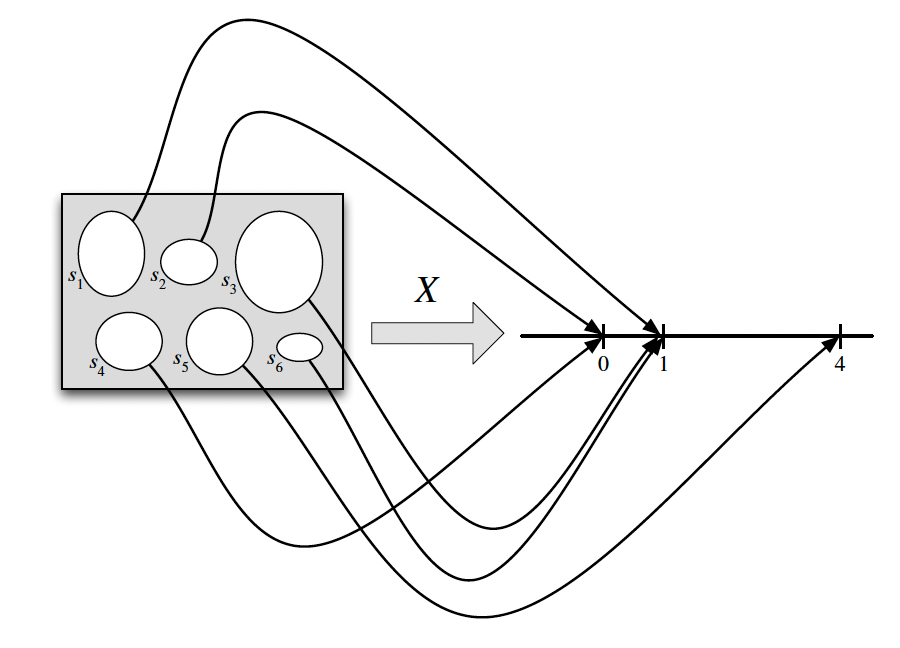

> *Figura 3.1.* Una variable aleatoria mapea el espacio muestral a la recta real. La v.a. $X$ representada aquí está definida sobre un espacio muestral con 6 elementos, y tiene valores posibles 0, 1 y 4. La aleatoriedad proviene de elegir una piedra aleatoria de acuerdo con la función de probabilidad $P$ para el espacio muestral.